# Seaborn Cheatbook

This notebook demonstrates how to do common tasks required in data visualization using Seaborn.

## Basics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
audi_df = pd.read_csv('./data/audi.csv')
df = sns.load_dataset('tips')
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
3,23.68,3.31,Male,No,Sun,Dinner,2
0,16.99,1.01,Female,No,Sun,Dinner,2
24,19.82,3.18,Male,No,Sat,Dinner,2
172,7.25,5.15,Male,Yes,Sun,Dinner,2


In [ ]:
qualitative_palettes = ['dark', 'muted', 'pastel', 'bright', 'dark', 'deep', 'colorblind', 
    'tab10', 'tab20', 'hot', 'summer', 'husl', 'Set2', 'Paired',] 
# tab10 is mpl default 

sequential_palettes = ['flare', 'crest', 'magma', 'viridis', 
    'Greys', 'Purples', 'Blues', 'Reds', 'Greens', 'Oranges', ]
diverging_palettes = ['vlag', 'icefire', 'Spectral', 'coolwarm', 
    'RdBu', 'PRGn', 'RdBu_r', ]

custom_palette = [ 'green', '#ABC', ]


contexts = ['paper', 'notebook', 'talk', 'poster'] # ascending size for labels etc
styles = ['dark', 'white', 'darkgrid', 'whitegrid', 'ticks']


The Seaborn way of doing the common scatter plot    
* Note how three variables are explored in one graph - bill (X) vs tip (Y), and group size which is represented using marker size.  
* Setting hue to same variable as size improves readability.  
* The scatterplot returns an Axes element, similar to matplotlib plots.  This is common to Seaborn APIs which return one chart.  
* It is good practice to label axes and title the chart  


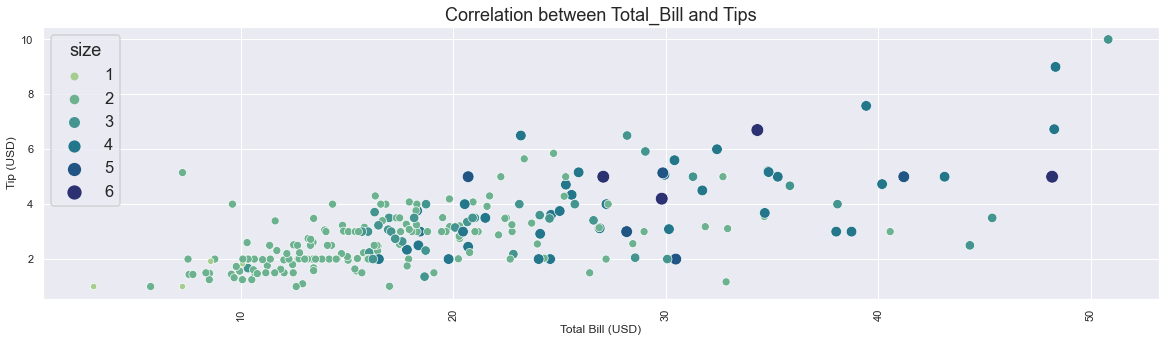

In [273]:

fig, ax = plt.subplots(figsize=(20, 5))
sns.set_style('dark')
sns.set_context('talk') # This can be used for a summary diagram.
g = sns.scatterplot(data = df, x = 'total_bill', y='tip', 
    size='size', 
    hue='size', palette='crest',
    ax=ax, 
)
g.set( # sns.scatterplot returns an Axes
    title='Correlation between Total_Bill and Tips', 
    xlabel = 'Total Bill (USD)', 
    ylabel = ('Tip (USD)'),
)
_ = plt.xticks(rotation = 90)

The Seaborn way of doing a Box Plot
* Here we use *catplot* - passing in variables fuelType (X), mpg (y)
* The variable model is used to draw subplots, note the order and wrapping. 
* The *catplot* will return a FacetGrid, like Seaborn API that plot multiple subplots.  There is a different way to set the title here.
* Note how the figure height is set using height and aspect.

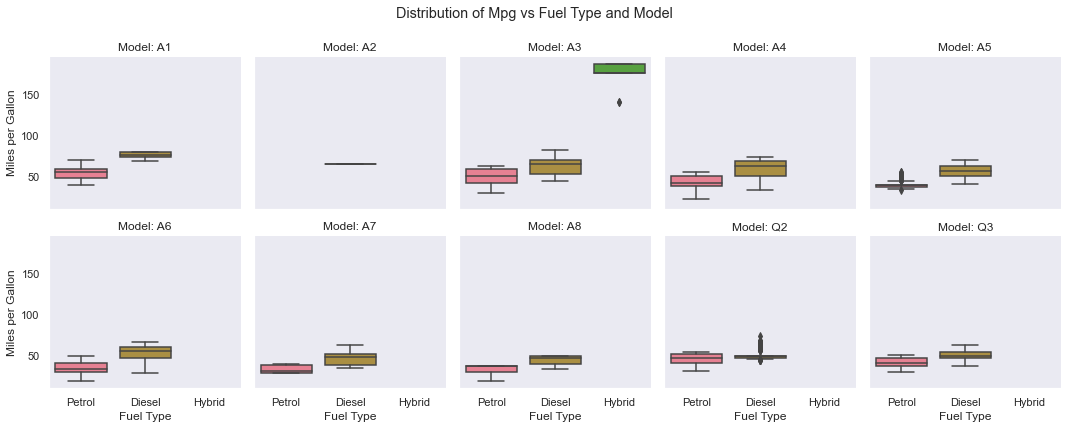

In [275]:
sns.set_context('notebook') # default
col_order = sorted( audi_df['model'].unique())[:10]
g = sns.catplot(kind='box', 
    data = audi_df, x = 'fuelType', y = 'mpg',
    col='model', col_order=col_order, col_wrap=5, 
    height=3, aspect=3/3, 
)
g.fig.suptitle('Distribution of Mpg vs Fuel Type and Model', y=0.99)
g.set_titles(col_template='Model:{col_name}')
g.set(
    ylabel = 'Miles per Gallon', 
    xlabel = 'Fuel Type',
)
_ = g.tight_layout()

## Categorical Plots

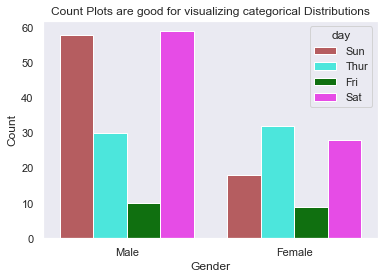

In [276]:
g = sns.countplot(data = df, x = 'sex', 
    hue='day', 
    hue_order = ['Sun', 'Thur', 'Fri', 'Sat'], 
    palette = {
        'Sun' : 'r', 'Thur': '#33FFF2', 'Fri': 'green', 'Sat': '#F3F',
    }
)
_ = g.set(
    title = 'Count Plots are good for visualizing categorical Distributions',
    xlabel = 'Gender', 
    ylabel = 'Count',
)

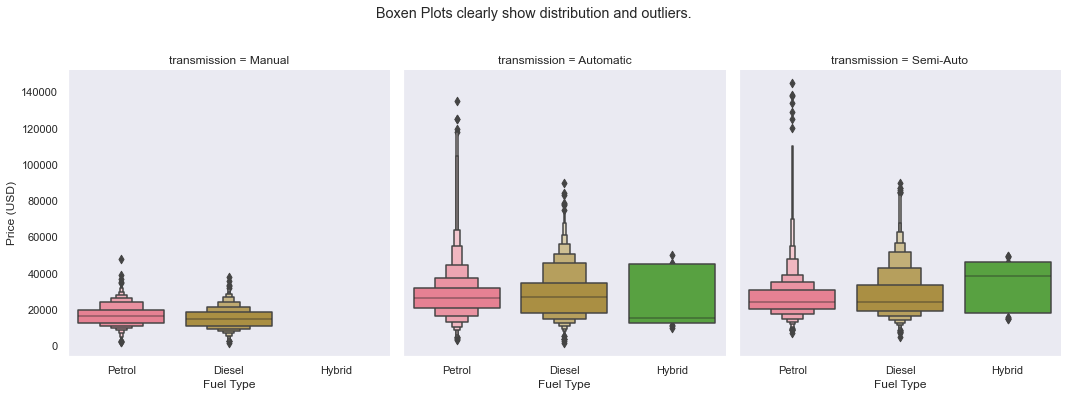

In [277]:
g = sns.catplot(kind='boxen', 
    data = audi_df, col='transmission', 
    x = 'fuelType',
    y='price',
)
g.fig.suptitle('Boxen Plots clearly show distribution and outliers.', y=1.1)
_ = g.set(
    xlabel = 'Fuel Type',
    ylabel = 'Price (USD)', 
)


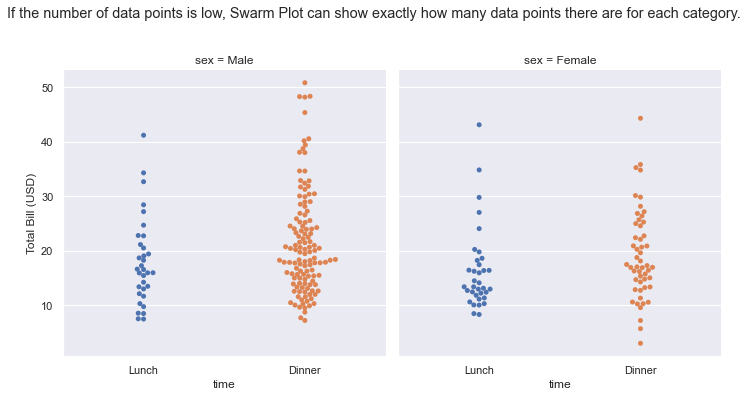

In [288]:
g = sns.catplot(kind='swarm', 
    data = df, col='sex', 
    x = 'time',
    y='total_bill',
)
g.fig.suptitle(
    'If the number of data points is low, Swarm Plot can show exactly how many data points there are for each category.', 
    y=1.1,
)
_ = g.set(
    ylabel = 'Total Bill (USD)'
)

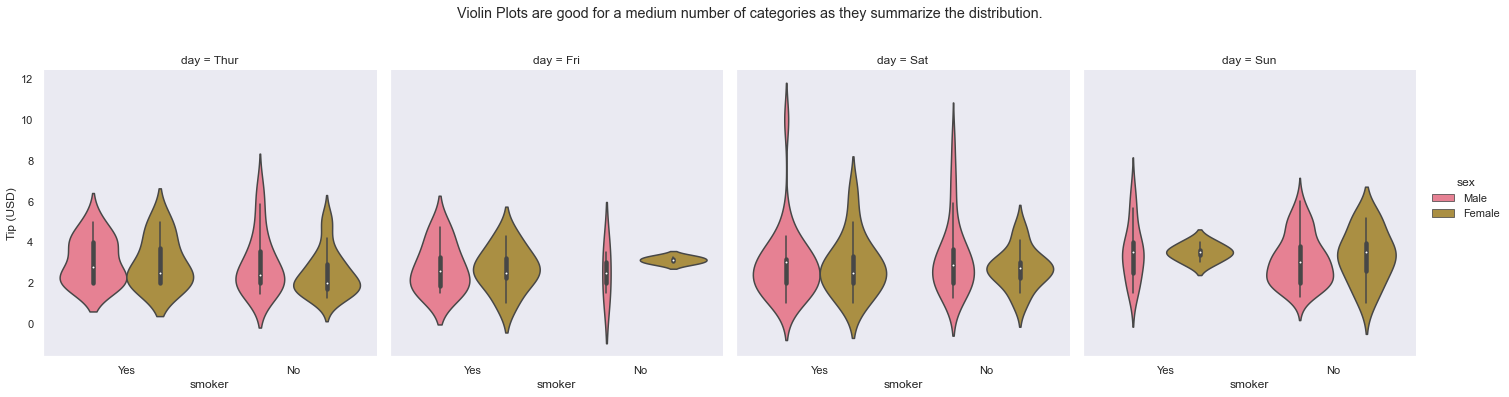

In [278]:
g = sns.catplot(kind='violin', 
    data = df, col='day', 
    x = 'smoker', y='tip', hue='sex',
)
g.fig.suptitle('Violin Plots are good for a medium number of categories as they summarize the distribution.', y=1.1)
_ = g.set(
    ylabel = 'Tip (USD)', 
)

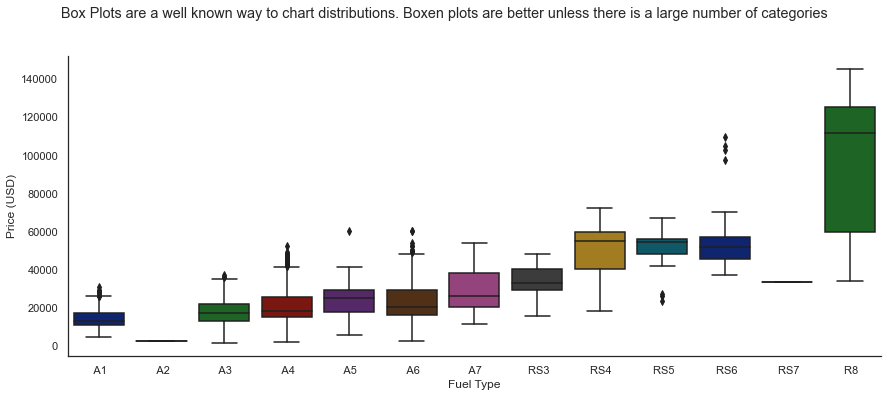

In [346]:
sns.set_style('white')
model_order = [' A1', ' A2', ' A3', ' A4', ' A5', ' A6', ' A7', ' RS3', ' RS4', ' RS5', ' RS6', ' RS7', ' R8'] # leave out some models 
g = sns.catplot(kind='box', 
    data = audi_df, 
    x = 'model', order = model_order,
    y='price',
    palette='dark',
    height=5, aspect=10/4, sharex=False,
    # whis=[5,95], #default whiskers extend to 1.5 * IQR (75q - 25q)
    # sym='', # Don't show outliers
)
g.set(
    xlabel = 'Fuel Type', 
    ylabel = 'Price (USD)',
)
_ = g.fig.suptitle('Box Plots are a well known way to chart distributions. Boxen plots are better unless there is a large number of categories', y=1.1)

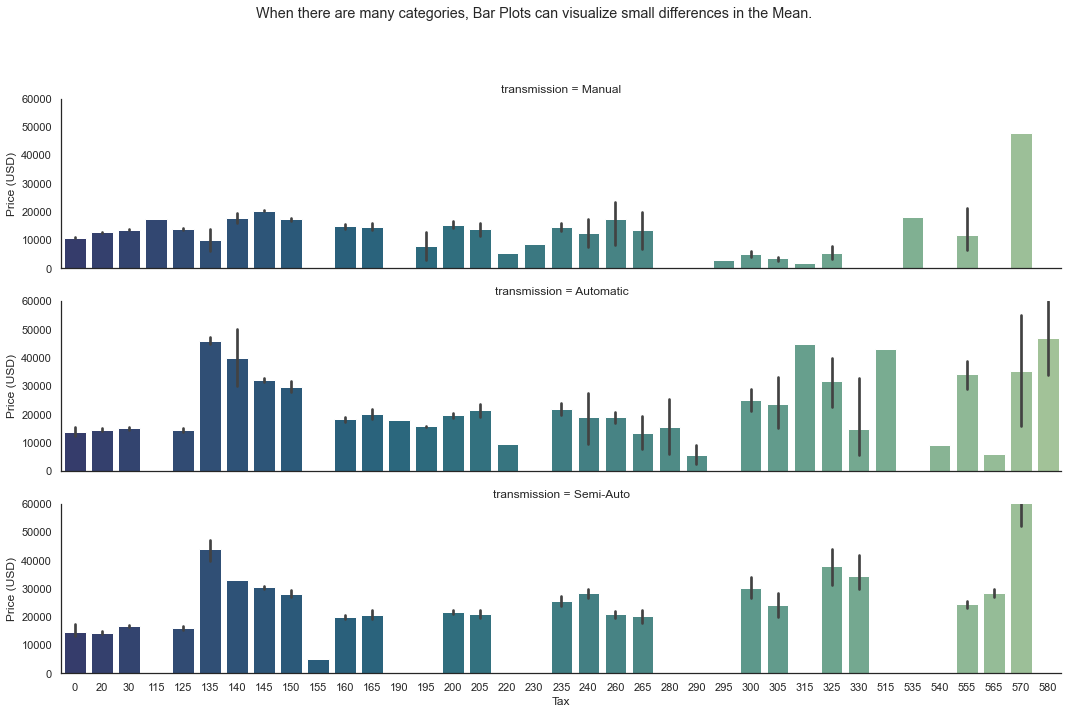

In [353]:

g = sns.catplot(kind='bar', 
    data = audi_df, row='transmission',
    x = 'tax', 
    y='price', palette='crest_r',
    height=3, aspect=15/3, 
    # ci = None, # The black line shows a 95% confidence interval for the real population mean.
)
g.fig.suptitle('When there are many categories, Bar Plots can visualize small differences in the Mean.', y=1.1)
_ = g.set(
    xlabel = 'Tax', 
    ylabel = 'Price (USD)', 
    ylim = (0, 60*1000),
)

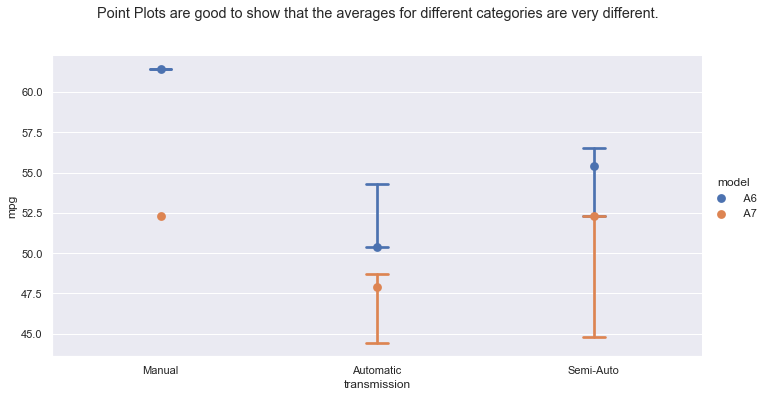

In [280]:

sns.set() # dark grid is default style
g = sns.catplot(kind='point', 
    data = audi_df, 
    x = 'transmission', y='mpg',
    hue='model', hue_order=[' A6', ' A7'],
    height=5, aspect=10/5,
    estimator=np.median,
    join = False, # disable lines joining the estimators
    capsize=0.1, # caps for confideence interval
    # ci = None, # The black line shows a 95% confidence interval for the real population mean.
)
_ = g.fig.suptitle(
    'Point Plots are good to show that the averages for different categories are very different.', 
    y=1.1,
)


Text(0.5, 1.1, 'Heat Maps can visualize averages for two Categories across a wide range.')

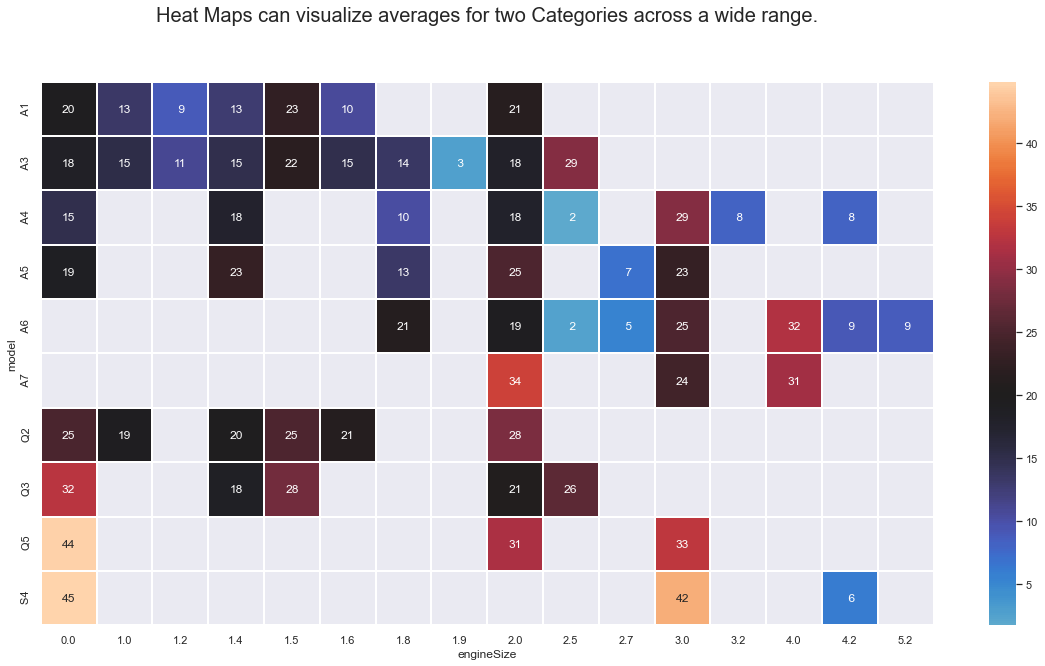

In [338]:
selected_models = audi_df['model'].unique()[:10]
small_df = audi_df[ audi_df['model'].isin(selected_models)]

df_crosstab = pd.crosstab(
        small_df['model'], 
        small_df['engineSize'], 
        values = small_df['price'], 
        aggfunc = lambda x : np.median(x) / 1000, 
)
fig,ax = plt.subplots(figsize=(20, 10))
_ = sns.heatmap( 
    df_crosstab,
    center = 20,
    ax = ax,
    annot=True, fmt='2.0f',
    cbar = True, 
    cmap = 'icefire', 
    linewidths=0.3, 
)
ax.set_title(
    'Heat Maps can visualize averages for two Categories across a wide range.', 
    y = 1.1,
    fontsize=20,
)


## Relational Plots

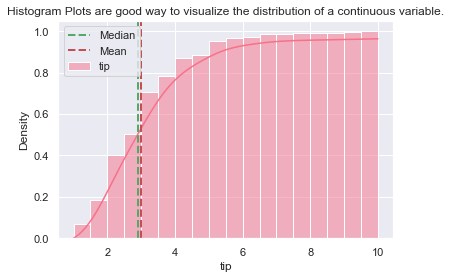

In [264]:
var_name = 'tip'
ax = sns.histplot(df[var_name], 
    kde=True, cumulative=True, stat='density',
    label=var_name)
ax.set(
    title = 'Histogram Plots are good way to visualize the distribution of a continuous variable.'
    # Alternative - ecdf plot 
)
ax.axvline( x = df[var_name].median(), 
    color='g', label='Median', linestyle='--', linewidth=2 )
ax.axvline( x = df[var_name].mean(), 
    color='r', label='Mean', linestyle='--', linewidth=2 )
ax.legend()

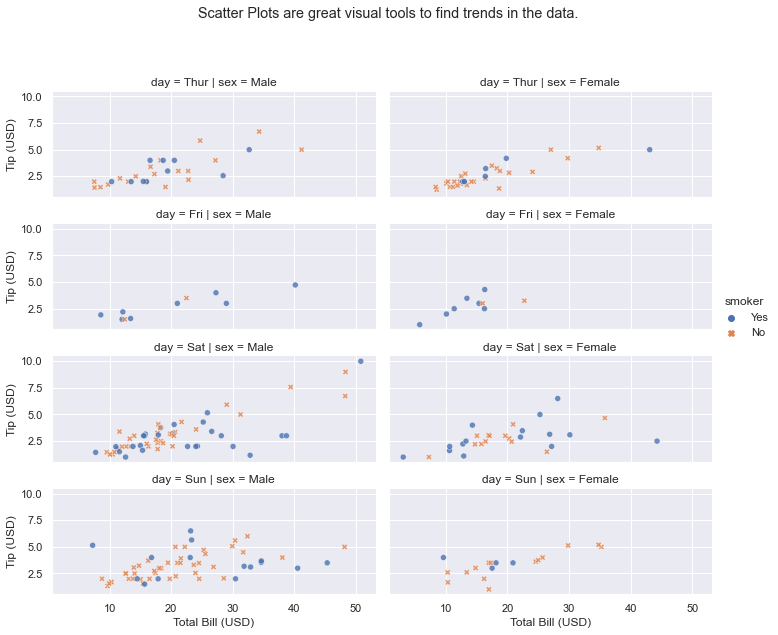

In [213]:
sns.set()
g = sns.relplot(kind='scatter', 
    data = df, 
    row='day', col='sex', 
    hue='smoker', style='smoker',
    x = 'total_bill', y='tip', 
    height=2, aspect=5/2,
    alpha = 0.8)
g.fig.suptitle('Scatter Plots are great visual tools to find trends in the data.', y=1.1)
_ = g.set(
    xlabel = 'Total Bill (USD)', 
    ylabel = 'Tip (USD)',
)

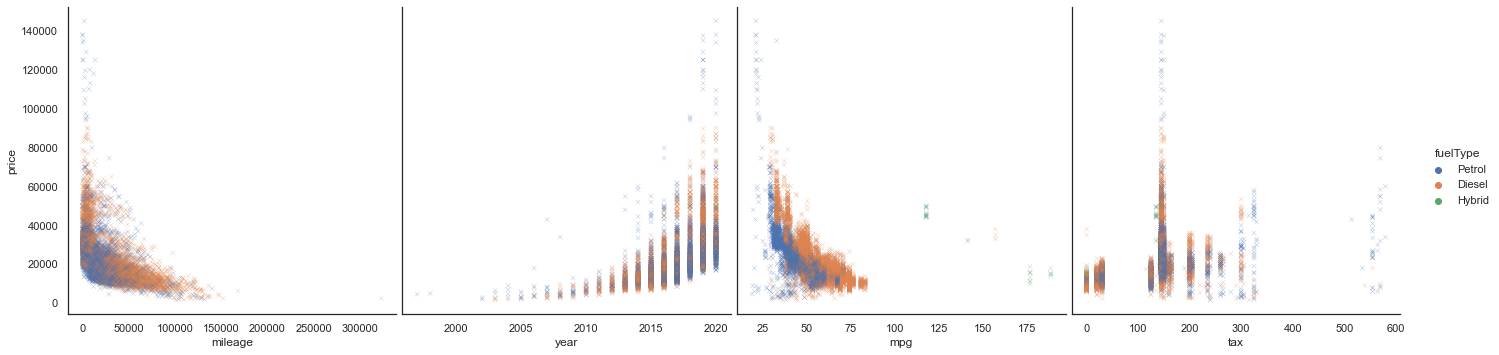

In [376]:
g = sns.pairplot(
    audi_df, 
    x_vars = ['mileage', 'year', 'mpg', 'tax',  ], 
    y_vars = ['price'],
    hue = 'fuelType',
    kind = 'scatter',
    plot_kws = {'alpha' : 0.5, 'marker': 'x', 's': 20, },
    diag_kind = 'kde',
    height = 5, aspect = 5/5, 
)

In [375]:
audi_df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

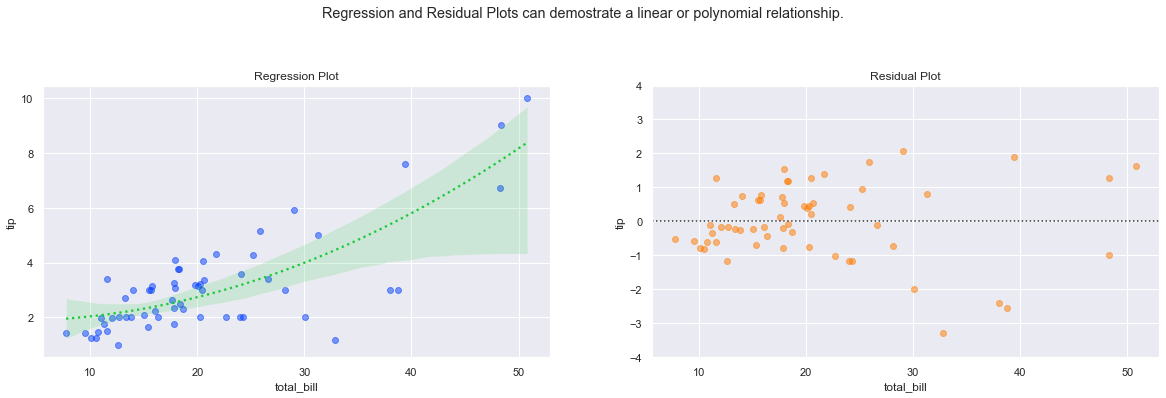

In [257]:
small_df = df[ (df['sex'] == 'Male') & (df['day'] == 'Sat') ] 

fig, (ax0, ax1) = plt.subplots(
    ncols=2, 
    figsize=(20,5), 
    sharex=True, 
)
fig.suptitle('Regression and Residual Plots can demostrate a linear or polynomial relationship.', y=1.1)
cmap = sns.color_palette('bright')

ax0.set(
    title = 'Regression Plot',
)
order = 2
var_name = 'total_bill'
ax = sns.regplot(data = small_df, x=var_name, y='tip', 
    fit_reg=True, order=order, 
    ax=ax0, color=cmap[0], 
    scatter_kws={'alpha':0.5, },
    line_kws={'color': cmap[2], 'ls':':', },
)

ax1.set(
    title = 'Residual Plot',
    ylim = (-4, 4)
)
_ = sns.residplot(data = small_df, x='total_bill', y='tip', 
    order=order,
    ax=ax1, color=cmap[1], scatter_kws={'alpha':0.5, } )

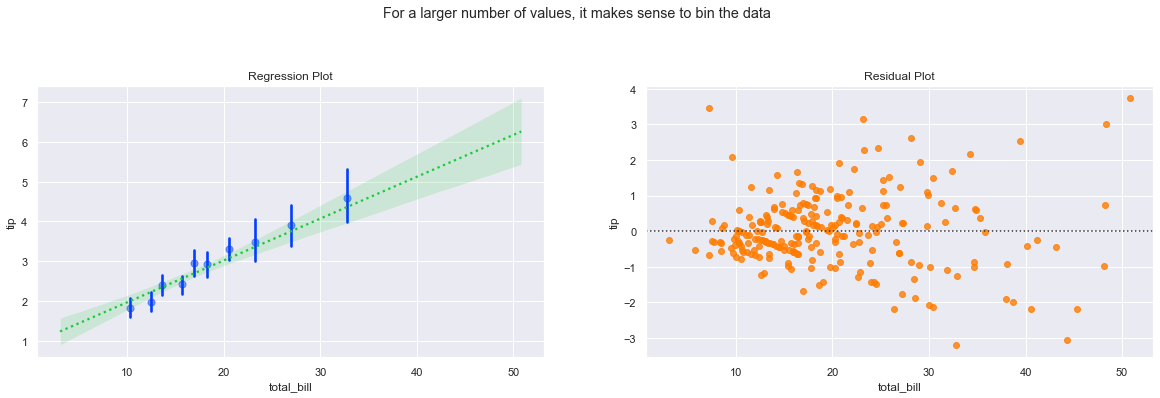

In [260]:
fig, (ax0, ax1) = plt.subplots(
    ncols=2, 
    figsize=(20,5), 
    sharex=True, 
)
fig.suptitle('For a larger number of values, it makes sense to bin the data', y=1.1)
cmap = sns.color_palette('bright')

ax0.set(
    title = 'Regression Plot',
)
order = 1
sns.regplot(data = df, x='total_bill', y='tip', 
    x_bins=10, 
    order=order, 
    fit_reg=True,
    ax=ax0, color=cmap[0], 
    scatter_kws={'alpha':0.5, },
    line_kws={'color': cmap[2], 'ls':':', },
)

ax1.set(
    title = 'Residual Plot',
    # ylim = (-10 * 1000, 10 * 1000)
)
_ = sns.residplot(data = df, x='total_bill', y='tip',  order=order,
    ax=ax1, color=cmap[1])

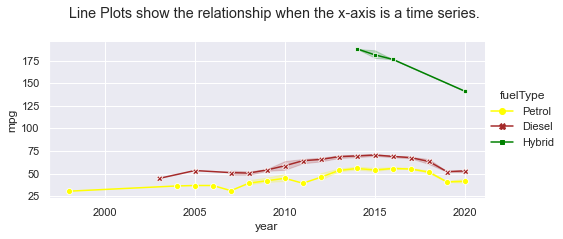

In [215]:
# Line plots are good for time series data

g = sns.relplot( kind='line', 
    data = audi_df[ audi_df['model'] == ' A3'], 
    x='year', y='mpg',
    style='fuelType', markers=True, dashes=False,
    hue='fuelType', palette={'Petrol': 'yellow', 'Diesel': 'brown', 'Hybrid': 'green'},
    # ci=None, # normally 95% confidence interval shows the mean
    height = 3, aspect = 7/3,
)
_ = g.fig.suptitle('Line Plots show the relationship when the x-axis is a time series.', y=1.1)